In [1]:
#Importing all the libraries 
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#Loading the data
ListingsBrief = pd.read_csv("/Users/SinnerMan/Desktop/Final Project/Final-Project-/listingsbrief.csv",encoding = 'utf-8')


In [3]:
#Loading the data
ListingsFull = pd.read_csv("/Users/SinnerMan/Desktop/Final Project/Final-Project-/listingsfull.csv",encoding = 'utf-8')

C:\Users\SinnerMan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
ListingsBrief

In [4]:
ListingsFull

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20190307044035,2019-03-07,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
1,8077,https://www.airbnb.com/rooms/8077,20190307044035,2019-03-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.45
2,12604,https://www.airbnb.com/rooms/12604,20190307044035,2019-03-07,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
3,23691,https://www.airbnb.com/rooms/23691,20190307044035,2019-03-07,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.94
4,26654,https://www.airbnb.com/rooms/26654,20190307044035,2019-03-07,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.36
5,27423,https://www.airbnb.com/rooms/27423,20190307044035,2019-03-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24
6,28160,https://www.airbnb.com/rooms/28160,20190307044035,2019-03-07,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,none,Simply the best and safest neighbourhood in T....,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
7,30931,https://www.airbnb.com/rooms/30931,20190307044035,2019-03-07,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,2,1,1,0,0.01
8,40456,https://www.airbnb.com/rooms/40456,20190307044035,2019-03-07,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,3,3,0,0,0.94
9,41887,https://www.airbnb.com/rooms/41887,20190307044035,2019-03-07,Great location,1 block Victoria Park Subway. 10 min to downto...,Across the street from Victoria Park Subway st...,1 block Victoria Park Subway. 10 min to downto...,none,This area in my opinion has the best access to...,...,t,f,moderate,f,f,2,2,0,0,2.82


In [5]:
#Listing the original dataset
ListingsFull=ListingsFull.set_index('id')

In [6]:
ListingsFull

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20190307044035,2019-03-07,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
8077,https://www.airbnb.com/rooms/8077,20190307044035,2019-03-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.45
12604,https://www.airbnb.com/rooms/12604,20190307044035,2019-03-07,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
23691,https://www.airbnb.com/rooms/23691,20190307044035,2019-03-07,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,* Laundry facilities are available at the prem...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.94
26654,https://www.airbnb.com/rooms/26654,20190307044035,2019-03-07,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.36
27423,https://www.airbnb.com/rooms/27423,20190307044035,2019-03-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24
28160,https://www.airbnb.com/rooms/28160,20190307044035,2019-03-07,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,none,Simply the best and safest neighbourhood in T....,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
30931,https://www.airbnb.com/rooms/30931,20190307044035,2019-03-07,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,2,1,1,0,0.01
40456,https://www.airbnb.com/rooms/40456,20190307044035,2019-03-07,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,3,3,0,0,0.94


In [7]:
ListingsFull.dtypes

listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                      object
xl_picture_url                                  

In [8]:
ListingsFull

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20190307044035,2019-03-07,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
8077,https://www.airbnb.com/rooms/8077,20190307044035,2019-03-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.45
12604,https://www.airbnb.com/rooms/12604,20190307044035,2019-03-07,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
23691,https://www.airbnb.com/rooms/23691,20190307044035,2019-03-07,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,* Laundry facilities are available at the prem...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.94
26654,https://www.airbnb.com/rooms/26654,20190307044035,2019-03-07,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.36
27423,https://www.airbnb.com/rooms/27423,20190307044035,2019-03-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24
28160,https://www.airbnb.com/rooms/28160,20190307044035,2019-03-07,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,none,Simply the best and safest neighbourhood in T....,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
30931,https://www.airbnb.com/rooms/30931,20190307044035,2019-03-07,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,2,1,1,0,0.01
40456,https://www.airbnb.com/rooms/40456,20190307044035,2019-03-07,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,3,3,0,0,0.94


In [9]:
#Checking the statistics of the columns
ListingsFull.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
scrape_id,20036.0,2.019031e+13,2.664129e+00,2.019031e+13,2.019031e+13,2.019031e+13,2.019031e+13,2.019031e+13
thumbnail_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medium_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xl_picture_url,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,20036.0,7.736749e+07,7.348320e+07,1.565000e+03,1.537457e+07,4.749041e+07,1.328396e+08,2.472546e+08
host_acceptance_rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,20032.0,5.779103e+00,1.390989e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.530000e+02
host_total_listings_count,20032.0,5.779103e+00,1.390989e+01,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,2.530000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,20036.0,4.367998e+01,4.789321e-02,4.358671e+01,4.364515e+01,4.366269e+01,4.369607e+01,4.383171e+01


In [10]:
#Creating another dataframe to work on
Listings1=ListingsFull

In [11]:
Listings1

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
1419,https://www.airbnb.com/rooms/1419,20190307044035,2019-03-07,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
8077,https://www.airbnb.com/rooms/8077,20190307044035,2019-03-07,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,none,NaN,NaN,...,t,f,strict_14_with_grace_period,f,t,2,1,1,0,1.45
12604,https://www.airbnb.com/rooms/12604,20190307044035,2019-03-07,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,none,NaN,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN
23691,https://www.airbnb.com/rooms/23691,20190307044035,2019-03-07,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,none,NaN,* Laundry facilities are available at the prem...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,1.94
26654,https://www.airbnb.com/rooms/26654,20190307044035,2019-03-07,"World Class downtown@ CN Tower! Jays, TIFF, ACC","CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,7,7,0,0,0.36
27423,https://www.airbnb.com/rooms/27423,20190307044035,2019-03-07,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...","Brand new, fully furnished studio basement apa...",none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.24
28160,https://www.airbnb.com/rooms/28160,20190307044035,2019-03-07,"Luxury,Safety, Affordability For Women Travell...",Summer sublet or monthly in Toronto's best mid...,"SALT-WATER POOL! SAFE, SECURE HIP NEIGHBOURHOO...",Summer sublet or monthly in Toronto's best mid...,none,Simply the best and safest neighbourhood in T....,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.17
30931,https://www.airbnb.com/rooms/30931,20190307044035,2019-03-07,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,Artists' Home With Spectacular Views! If you w...,Split level waterfront condo with a breathtaki...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,2,1,1,0,0.01
40456,https://www.airbnb.com/rooms/40456,20190307044035,2019-03-07,Entire Suite in Downtown+Parking,NaN,-----------------IMPORTANT--------------------...,-----------------IMPORTANT--------------------...,none,NaN,NaN,...,f,f,strict_14_with_grace_period,f,t,3,3,0,0,0.94


In [12]:
#Converting price to a float
Listings1['price'] = Listings1['price'].str.replace('$', '')
Listings1['price'] = Listings1['price'].str.replace(',', '').astype('float64')

price                                           1.000000e+00
accommodates                                    3.387481e-01
bathrooms                                       3.230227e-01
bedrooms                                        3.082325e-01
beds                                            2.983001e-01
square_feet                                     2.171350e-01
guests_included                                 1.867106e-01
review_scores_location                          8.235573e-02
availability_30                                 6.743119e-02
calculated_host_listings_count_entire_homes     6.553013e-02
availability_60                                 5.766556e-02
availability_365                                5.506590e-02
availability_90                                 4.894757e-02
review_scores_cleanliness                       4.671307e-02
review_scores_rating                            4.589095e-02
host_total_listings_count                       2.439685e-02
host_listings_count     

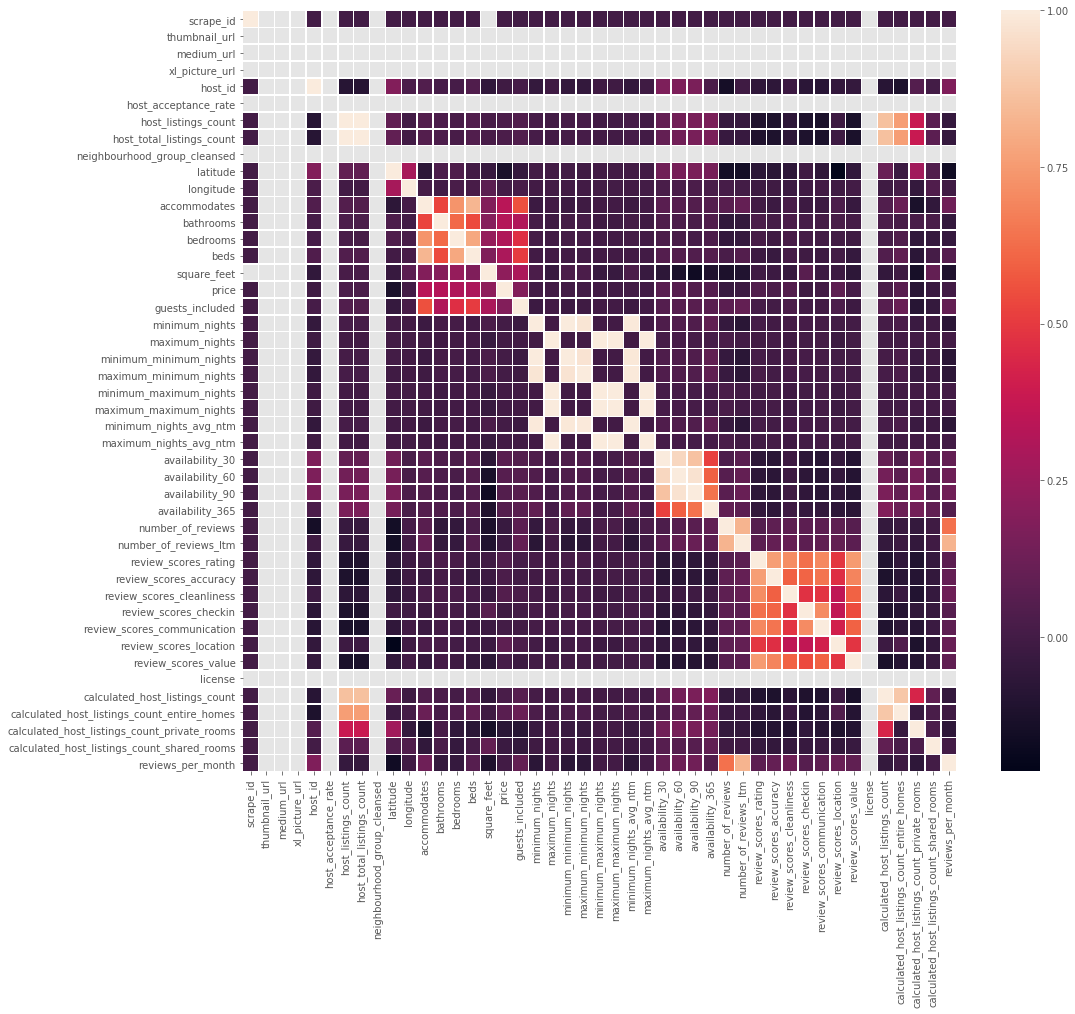

In [13]:
#Correlation Matrix to see the most correlated features with price
fig, ax = plt.subplots(figsize=(16,14))
corr = Listings1.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, linewidths=.5, ax=ax)
corr['price'].sort_values(ascending=False)

In [14]:
#Based on the above correlations and a sense test, we select the follwing features for our models
Listings1.head()
selected_columns = [
                'id',
                'host_response_rate',
                'host_is_superhost',
                'zipcode',
                'property_type',
                'room_type',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'bed_type',
                'amenities',
                'price',
                'guests_included',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value'
]

Listings1.drop( 
    [key for key in Listings1.keys() if key not in selected_columns] ,
    axis=1, 
    inplace=True)

In [15]:
Listings1

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
id,,,,,,,,,,,,,,,,,,,,
1419,NaN,f,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",469.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
8077,NaN,f,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",100.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0
12604,NaN,f,M6G,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",67.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23691,100%,t,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",70.0,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0
26654,81%,f,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0
27423,100%,f,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",54.0,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0
28160,100%,f,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{Wifi,""Air conditioning"",""Wheelchair accessibl...",80.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0
30931,NaN,f,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",134.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN
40456,100%,f,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",125.0,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0


In [16]:
#Since amenities is a textual feature, and we know longer the amenities means more the amenities which should be directly correlated to the price. So calculating the length of the amenities
Listings1.loc[:,'amenities_length'] = Listings1['amenities'].str.len()

In [17]:
Listings1

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length
id,,,,,,,,,,,,,,,,,,,,,
1419,NaN,f,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,...,469.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179
8077,NaN,f,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,...,100.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161
12604,NaN,f,M6G,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,...,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
23691,100%,t,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,...,70.0,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618
26654,81%,f,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,...,200.0,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645
27423,100%,f,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,54.0,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279
28160,100%,f,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,...,80.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539
30931,NaN,f,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,...,134.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134
40456,100%,f,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,...,125.0,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358


In [18]:
#Dropping the original amenities column
Listings1 = Listings1.drop(['amenities'], 1)

In [19]:
Listings1

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length
id,,,,,,,,,,,,,,,,,,,,
1419,NaN,f,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,469.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179
8077,NaN,f,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,100.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161
12604,NaN,f,M6G,House,Private room,1,1.5,1.0,1.0,Pull-out Sofa,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
23691,100%,t,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,70.0,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618
26654,81%,f,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,200.0,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645
27423,100%,f,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,54.0,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279
28160,100%,f,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,80.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539
30931,NaN,f,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,134.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134
40456,100%,f,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,125.0,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358


In [ ]:
## DEVIATIONZZZ

In [20]:
#Converting the true/false values to binary 0/1
Listings1['host_is_superhost'].replace('t',1, inplace=True)
Listings1['host_is_superhost'].replace('f',0, inplace=True)

In [21]:
#Recoding property_type values 
def recode(value):
    if value not in ['House', 'Apartment', 'Touwnhouse', 'Condominium']:
        return 'Other'
    return value

Listings1['property_type'] = Listings1['property_type'].apply(recode)

In [22]:
#Recoding bed_type values
def recode(value):
    if value not in ['Real Bed']:
        return 'Other'
    return value

Listings1['bed_type'] = Listings1['bed_type'].apply(recode)

In [ ]:
#Filling the empty values in the columns
listings_final['bathrooms'].fillna(method='ffill', inplace=True)
listings_final['bedrooms'].fillna(method='ffill', inplace=True)
listings_final['beds'].fillna(method='ffill', inplace=True)
listings_final['host_is_superhost'].fillna(value=0,inplace=True)
listings_final['host_response_rate'].fillna(value=0,inplace=True)

In [23]:
Listings1

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length
id,,,,,,,,,,,,,,,,,,,,
1419,NaN,0.0,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,469.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179
8077,NaN,0.0,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,100.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161
12604,NaN,0.0,M6G,House,Private room,1,1.5,1.0,1.0,Other,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
23691,100%,1.0,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,70.0,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618
26654,81%,0.0,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,200.0,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645
27423,100%,0.0,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,54.0,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279
28160,100%,0.0,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,80.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539
30931,NaN,0.0,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,134.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134
40456,100%,0.0,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,125.0,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358


In [24]:
Listings1.isna().sum()

host_response_rate             5352
host_is_superhost                 4
zipcode                         385
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        14
bedrooms                         11
beds                             25
bed_type                          0
price                             0
guests_included                   0
review_scores_rating           4247
review_scores_accuracy         4258
review_scores_cleanliness      4257
review_scores_checkin          4262
review_scores_communication    4256
review_scores_location         4265
review_scores_value            4263
amenities_length                  0
dtype: int64

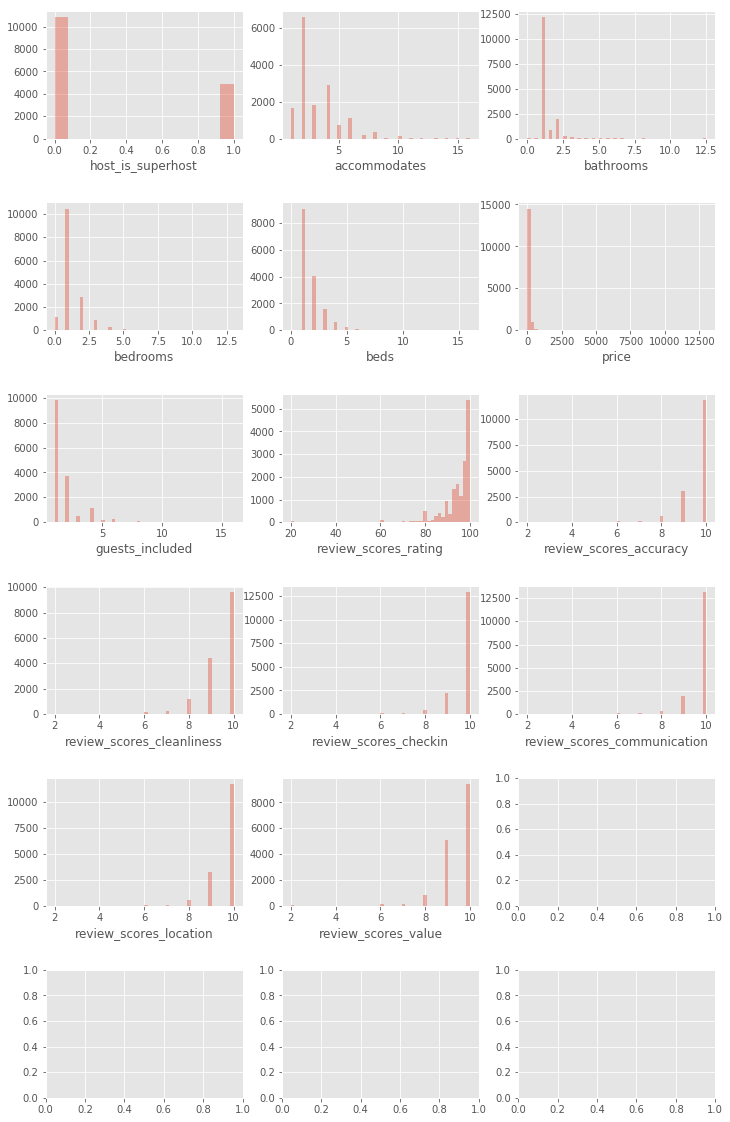

In [25]:
#Creating distribution charts for all the numbered features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numdf = Listings1.select_dtypes(include=numerics)
numdf = numdf.dropna(axis=0, how='any')
numdf_variables = list(numdf)

graphs = len(numdf_variables)-1

position = []
for i in range(6):
    for j in range(3):
        b = i,j
        position.append(b)
        
fig, axes = plt.subplots(nrows=6, ncols=3, sharey=False, sharex=False, figsize=(12,20))
fig.subplots_adjust(hspace=.5)

for i in range(graphs):
    sns.distplot(numdf[numdf_variables[i]], ax=axes[position[i]], kde=False)

In [30]:
Listings1

,host_response_rate,host_is_superhost,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_length
id,,,,,,,,,,,,,,,,,,,,
1419,NaN,0.0,M6J,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,469.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,179
8077,NaN,0.0,M5J,Apartment,Private room,2,1.5,1.0,1.0,Real Bed,100.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,161
12604,NaN,0.0,M6G,House,Private room,1,1.5,1.0,1.0,Other,67.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
23691,100%,1.0,M6E 2P3,House,Private room,2,1.0,1.0,1.0,Real Bed,70.0,2,95.0,10.0,10.0,10.0,10.0,9.0,9.0,618
26654,81%,0.0,M5V 3P5,Condominium,Entire home/apt,5,1.0,1.0,2.0,Real Bed,200.0,2,95.0,9.0,9.0,9.0,9.0,10.0,9.0,645
27423,100%,0.0,M4L 2P8,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,54.0,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,279
28160,100%,0.0,M4S 2M5,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,80.0,1,97.0,10.0,10.0,10.0,10.0,10.0,10.0,539
30931,NaN,0.0,M5J 2V3,Apartment,Entire home/apt,2,1.5,1.0,2.0,Real Bed,134.0,1,100.0,NaN,NaN,NaN,NaN,NaN,NaN,134
40456,100%,0.0,M6K 1J3,House,Entire home/apt,6,1.0,2.0,2.0,Real Bed,125.0,4,92.0,9.0,9.0,10.0,10.0,9.0,9.0,358


In [ ]:
# Histogram by Type of Crime
sb.set()
plt.figure(figsize=(10,5))
plt.title('Number of Crimes in Toronto by Type (2014-2017)', fontsize = 14, fontweight = 'bold')
plt.xlabel('Major Crime Indicator', fontweight = 'bold')
plt.ylabel('Number of Crimes (2014-2017)', fontweight = 'bold')
plt.hist(crime_type_list)

# Save figure and show it
plt.savefig('Number of Crimes in Toronto by Type (2014-2017)')
plt.show()